## Simple Linear Regression

In [61]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [4]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.shape

(25, 2)

In [7]:
#dataframe describe
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# Understanding the attribute names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Since this data has a very less data and only 2 numeric columns so ne need of mapping directly moving to Data Visualization

## Data Visualisation:

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

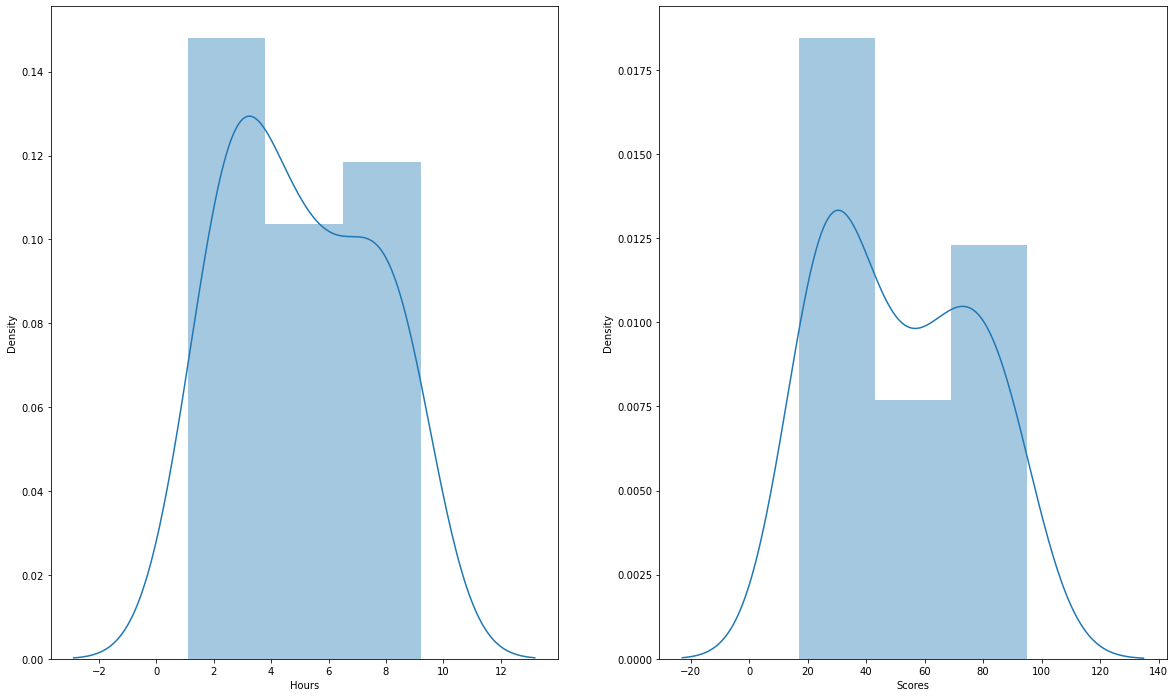

In [10]:
# Visualizing numerical variables
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.distplot(df['Hours'])
plt.subplot(1,2,2)
sns.distplot(df['Scores'])

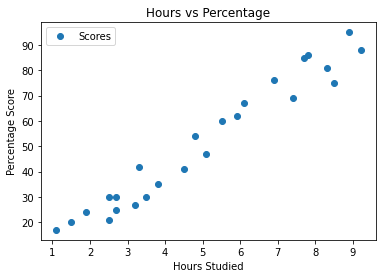

In [14]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Inference we can draw from here is that there is a linear relationship between the 2 attributes

<AxesSubplot:>

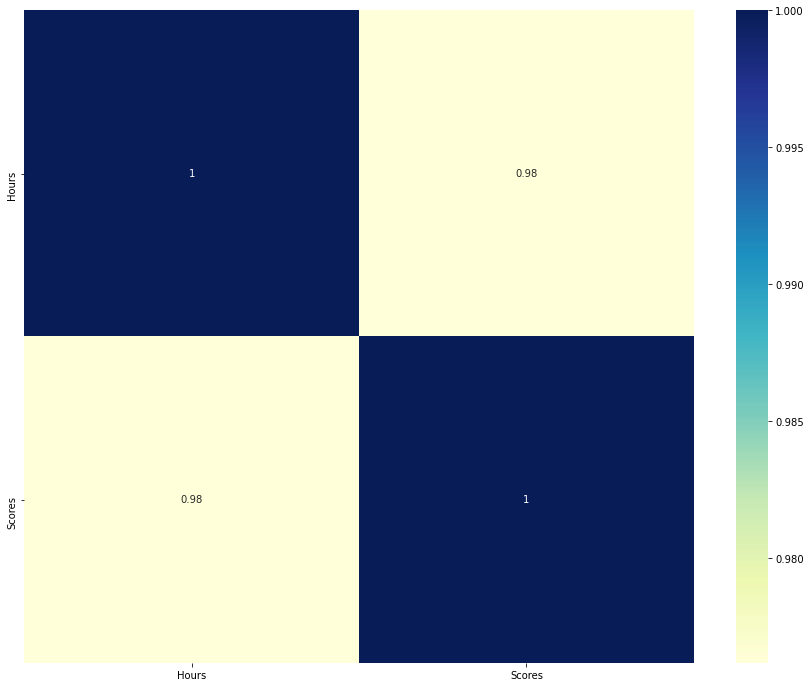

In [15]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

Heatmap also that the correlation is almost close to 1

## Data Preparation:

In [41]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [42]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [46]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

LinearRegression()

In [47]:
print(lr.intercept_)
print(lr.coef_)

2.018160041434683
[9.91065648]


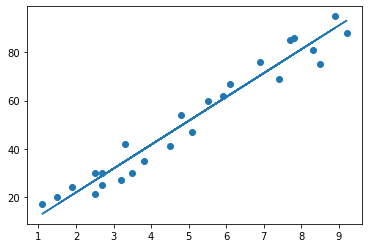

In [48]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting on X
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

The equation of the line is : Score=9.91*Hours + 2.01

In [ ]:
#Prediction on train data
y_pred_train = lr.predict(X_train) # Predicting the scores

In [67]:
#R-squared on train data
r_squared = r2_score(y_train, y_pred_train)
r_squared

0.9515510725211552

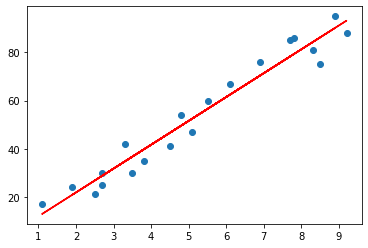

In [68]:
#Plot on the train data
plt.scatter(X_train, y_train)
plt.plot(X_train, 9.91 * X_train + 2.01 , 'r')
plt.show()

## Making Predictions

In [54]:
#Prediction of test data
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [56]:
# Comparing Actual vs Predicted
rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
rf

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [58]:
hours = [[9.25]]
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


## Evaluating the model

In [60]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [62]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

4.6474476121003665

In [63]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9454906892105356

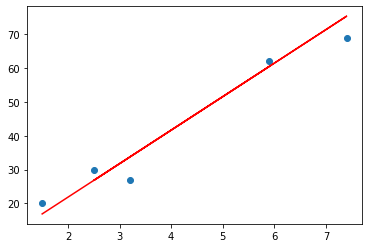

In [69]:
#Plot on the test data
plt.scatter(X_test, y_test)
plt.plot(X_test, 9.91 * X_test + 2.01 , 'r')
plt.show()